### Final Project
* Tom Borgstadt
* 6304 Text Mining
* Fall 2015 (b)
* December 9, 2015

In [1]:
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame

import json
import datetime
import timeit

# print options
pd.set_option('display.max_colwidth', 140)


In [2]:
# confusion matrix
def Create_CM(actual, predicted, labels):
    from sklearn import metrics

    cm = metrics.confusion_matrix(actual, predicted) 

    plt.matshow(cm)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    #plt.xticks(tick_marks, labels, rotation=45)
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(cm)
    

In [3]:
def Lower_Case(List_of_Strings):

    z = [string.lower() for string in List_of_Strings]
    
    return(z)


In [4]:
def Remove_Spec_Chars(List_of_Strs):
    import re
    
    z = []
    for string in List_of_Strs:
        newstr = string
        newstr = ''.join([i if ord(i) < 128 else ' ' for i in newstr]) # remove non-ascii chars
        newstr = newstr.replace("\n", " ")                             # linux new line
        newstr = re.sub(' +',' ', newstr)                         # remove extra whitespace
        newstr = re.sub(r'([a-z])-([a-z])', r'\1\2', newstr)      # remove hyphens in hyphenated words
        newstr = re.sub("[!@#$?&:;,_().]", '', newstr)            # remove general special characters
        newstr = re.sub('["]', '', newstr)                        # remove double ticks
        newstr = re.sub(r"http\S+", "", newstr)                   # remove http links
       
        z.append(newstr)
    
    return(z)
    

In [5]:
def Remove_Stop_Words(List_of_Strings):
    from sklearn.feature_extraction import text
    
    global cachedStopWords
    
    skl_stopwords = text.ENGLISH_STOP_WORDS
    cachedStopWords = list(skl_stopwords) + ['00','000','01','02','03','04','05','06','07','08','09','10','100',
            '11', '12', '13', '14', '15', '16', '17', '18','19','20','21','22','23','24','25','26','27','28','29',
            '30','31','345','38','40','44','45','50','65','75','76','78','646','713','800','853','865','999','2000','2001',
            '2002','2003','2004','2005','2006','2007','2008','advertisement','maria','mr','photo','sheahan', 'reading',
            'continue','000270ks','005380ks','mike','ingram','english','112','124','136','150','189','200','main','story',
            '1000','10000','100000','101','1970s','1980s','1990','1990s','1998','1999','20000','2009','2010','2011','2012',
            '2013','2014','2015','288','300','002','004','005','005930ks','006400ks','009150ks','011760ks','066570ks',
            '007','008','010','0130','015','0151','025','027','031','035','042','0500','056','060','061','06564','06989',
            '32','33','34','35','350','36','39','41','42','43','47','48','500','51','52','53','54','55','60','600','6000',
            '600000','62','63','64','65','67','68','69','70','5000','50000','500000','700','7000','7203t','73','80','85',
            '86','87','88','89','90','900','90000','91','92','93','94','95','96','97','98','99']
    
    z = []
    z = [' '.join([word for word in string.split() if word not in cachedStopWords]) for string in List_of_Strings]
    
    return(z)


In [6]:
def Lemmatize(List_of_Strings):
    import nltk
    from nltk.stem import WordNetLemmatizer

    wnl = WordNetLemmatizer()
  
    z = []                                  
    for sentence in List_of_Strings:
        l = " ".join([wnl.lemmatize(i) for i in sentence.split()])
        z.append(l)

    return(z)


In [7]:
def Lemmatize_with_POS(List_of_Strings):
    import nltk
    from nltk import word_tokenize
    from nltk.stem import WordNetLemmatizer

    wnl = WordNetLemmatizer()

    z = []
    wordtype = set(['R','V','N'])

    for string in List_of_Strings:
        newlem = []

        taggedlist = nltk.pos_tag(word_tokenize(string))
        for item in taggedlist:
            if item[1][0] in wordtype:
                postag = item[1][0].lower()
            elif item[1][0] == 'J':
                postag = 'a'
            else:
                postag = "n"

            lemmed = wnl.lemmatize(item[0], pos = postag)
            newlem.append(lemmed)

        newstring = " ".join(newlem)

        z.append(newstring)
    
    return(z)


In [8]:
def Assign_Sentiment(List_of_Strings):

    # define a dictionary that pulls the list of words from local text file.
    afinn = dict(map(lambda (k,v): (k,int(v)), [ line.split('\t') for line in open(pathname + "AFINN-111.txt") ]))
    
    afinn_list = []    # output list with sentiment to be bound with input list later

    for string in List_of_Strings:
        
        sentcount = 0
        sentiment = 'Neutral'                # default value
        
        for word in string.split():  
            if word in afinn:
                sentcount = sentcount + afinn[word]
        
        if (sentcount < 0):
            sentiment = 'Negative'
        elif (sentcount > 0):
            sentiment = 'Positive'
                
        afinn_list.append(sentiment)
    
    z = DataFrame(zip(List_of_Strings, afinn_list), columns=['Tweet', 'AFinn'])
    
    return(z)


In [9]:
def Split_Train():
    from sklearn.cross_validation import train_test_split
    
    global Data_train, Data_test, Labels_train, Labels_test
    
    # Create training and testing sets
    Data = v_m_array
    Labels = corpus['Topics'].values       # labels (topics), this is the target variable

    # Split the data into a training set and a testing set
    Data_train, Data_test, Labels_train, Labels_test = train_test_split(Data, Labels, test_size=0.4, random_state=42)

    # check if dimensions agree, if not halt with error
    if (int(Data_train.shape[0]) != int(Labels_train.shape[0])) or (int(Data_test.shape[0]) != int(Labels_test.shape[0])):
        print "Training Data dims:   " + str(Data_train.shape)
        print "Test Data dims:       " + str(Data_test.shape)
        print "Training Labels dims: " + str(Labels_train.shape)
        print "Test Labels dims:     " + str(Labels_test.shape)    
        raise ValueError('Error during split')

    vector_dim = str(vector_smatrix.shape)
    
    print'\n----- Overall Target Distribution --------\n'
    print corpus['Topics'].value_counts()
    
    # Generate a quick and dirty distribution of the record sets
    k = zip(corpus['Topics'].value_counts(),Series(Labels_train).value_counts(), Series(Labels_test).value_counts())
    dist = DataFrame(k, columns=['Full', 'Train', 'Test' ])

    print'\n----- Distribution of Train/Test -------- \n'
    print dist.sum(axis=0)
    
    print'\n--- Dist of Target in each Train/Test --- \n'
    print dist    
    

In [10]:
def Fit_Predict_Assess(model):
    from sklearn import metrics
    
    # fit model to the training data  - training at this point only
    model.fit(Data_train, Labels_train)

    # make predictions
    dt_expected = Labels_test
    dt_predicted = model.predict(Data_test)

    dt_acc = metrics.accuracy_score(dt_expected, dt_predicted)

    # summarize the fit of the model
    print('\naccuracy: ' + str(dt_acc) + '\n')
    print(metrics.classification_report(dt_expected, dt_predicted))

    # confusion matrix
    Create_CM(dt_expected, dt_predicted, np.unique(Labels_train))
  

In [11]:
def cosine_similarity(v1,v2):
    from math import sqrt
    
    # compute cosine similarity of v1 to v2: (v1 dot v1)/(||v1||*||v2||)'
    # the L2-normalized dot product of vectors
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]
        y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y

    return(sumxy/sqrt(sumxx*sumyy))


In [12]:
def Replace_Dict_Values(List_of_Strings):
    import re
    
    d = {'diesels':'diesel',
         'dieselpowered':'diesel',
         'automobile':'auto',
         'testing':'test',
         'chinese':'china',
         'germany':'german',
         'korean':'korea',
         'cars':'car',
         'tests':'test',
         'australian':'australia',
         'beijing':'china'}
    
    z = []
    for s in List_of_Strings:
        pattern = re.compile(r'\b(' + '|'.join(d.keys()) + r')\b')
        z.append(pattern.sub(lambda x: d[x.group()], s))
    
    return(z)


In [13]:
def PCA(components):
    from sklearn.decomposition import PCA
    
    global pca
    global X_pca

    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(v_m_array)
    print '\nPCA Explained Variance Ratio: '+ str(pca.explained_variance_ratio_)
    print '\nPCA Total Variance Explained: ' + str(sum(pca.explained_variance_ratio_))


In [14]:
def Randomized_PCA(components):
    from sklearn.decomposition import RandomizedPCA

    global rpca
    global X_rpca
    
    rpca = RandomizedPCA(n_components=components)
    X_rpca = rpca.fit_transform(v_m_array)
    print '\nrPCA Explained Variance Ratio: '+ str(rpca.explained_variance_ratio_)
    print '\nrPCA Total Variance Explained: ' + str(sum(rpca.explained_variance_ratio_))
    

In [15]:
def K_Means(clusters, mxitr, procs):
    from sklearn.cluster import KMeans
    
    global k           # k-means def
    global k_m         # k-means model
    global k_clusters  # k-means clusters

    k = KMeans(n_clusters=clusters, init='k-means++', max_iter=mxitr, n_jobs=procs, random_state = 42)
    k_m = k.fit(v_m)
    k_clusters = k.labels_.tolist()


In [16]:
def K_Means_Optimal(rng, mxitr, procs):
    from sklearn.cluster import KMeans
    from scipy.spatial.distance import cdist, pdist
    
    global v_m_array
    
    # generate a range of k-means for analysis
    k_range = range(1,rng+1)
    k_means_set = [KMeans(init='k-means++', n_clusters=k, max_iter=mxitr, n_jobs=procs, random_state = 42).fit(v_m_array) for k in k_range]
    centroids_list = [km_result.cluster_centers_ for km_result in k_means_set]

    # calc euclidean dist from each point to each cluster center
    k_euclid = [cdist(v_m_array, centroid, 'euclidean') for centroid in centroids_list]
    distance_set = [np.min(k_euc, axis=1) for k_euc in k_euclid]

    # total within-cluster sum of squares
    wcss = [np.sum(distance**2) for distance in distance_set]

    # total sum of squares
    tss  = np.sum(pdist(v_m_array)**2) / v_m_array.shape[0]

    # between cluster sum of squares
    bss = tss - wcss

    # plot elbow chart
    %matplotlib inline
    import matplotlib as mpl
    import matplotlib.pyplot as plt

    print
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(k_range, bss/tss*100, '^-')
    ax.set_ylim((0,30))
    plt.grid(True)
    plt.xlabel('K n_clusters')
    plt.ylabel('% Variance Explained')
    plt.title('% Var Explained vs K')
    

In [17]:
def K_Means_wPCA(clusters, procs):
    from sklearn.cluster import KMeans
    
    global X_rpca

    k_means_pca = KMeans(init='k-means++', n_init=100, n_clusters=clusters, n_jobs=procs)
    k_means_pca.fit(X_rpca)
    k_means_pca_labels = k_means_pca.labels_.tolist()
    print "\nK-Means PCA Cluster Labels: " + str(np.unique(k_means_pca.labels_))
    print "K-Means PCA Distribution of Cluster Assignments: " + str(np.bincount(k_means_pca.labels_))

    # plot clusters
    %matplotlib inline
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 9))
    for i in range(clusters):
        # select only data observations with cluster label == i
        ds = X_rpca[np.where(k_means_pca.labels_==i)]
        # plot the data observations
        plt.plot(ds[:,0],ds[:,1],'o',markersize=1)
    plt.show()
    

In [18]:
def LDA_Topic_Model(n_topics, n_top_words):
    import lda
    import lda.datasets

    model = lda.LDA(n_topics, n_iter=500, random_state=1)
    model.fit(cv_m_array)

    topic_word = model.topic_word_
    vocab = cv.get_feature_names()

    for n in range(n_top_words):
        sum_pr = sum(topic_word[n,:])
        #print("topic: {} sum: {}".format(n, sum_pr))

    print '\n------------ LDA Topics --------------\n'
    for i, topic_dist in enumerate(topic_word):
        topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
        print('*Topic {}\n- {}'.format(i, ' '.join(topic_words)))
        

In [19]:
def Create_Tfid_Vector(collection, mindf, maxdf):
    from sklearn.feature_extraction.text import TfidfVectorizer
    
    global v                 # vectorizer object
    global v_m               # vector sparse matrix
    global v_m_array         # vector sparse matrix array equivalent
    global v_m_features      # vector sparse matrix feature names
    global bag_of_words
  
    v = TfidfVectorizer(binary = False, 
                        lowercase = True, 
                        stop_words = cachedStopWords, 
                        min_df=mindf,
                        max_df=maxdf)
    
    v_m = v.fit_transform(collection)
    v_m_idf = v.idf_
    v_m_array = v_m.toarray()
    v_m_features = v.get_feature_names()
    
    print v_m.shape    

    # load words and weights into a data frame by descending weight
    bag_of_words = DataFrame(zip(v_m_features, v_m_idf), columns=['word', 'weight']).sort_values(['word'])
    print '\n-------------- Bag of Words -----------------\n'
    print(bag_of_words.sort_values(['weight'], ascending=0).head(25))
    

In [20]:
def Old_NMF_Topic_Model(n_topics, n_top_words, assign_topics):
    from sklearn.decomposition import NMF

    global nmf
    global corpus_with_nmf            # this is built if assign_topics=True
    
    nmf = NMF(n_components=n_topics, random_state=1).fit(v_m)

    # the non-negative factorized sparse matrix
    # print '\n---- NMF factorized sparse matrix ----\n'
    # print nmf.components_
    # print
    # print type(nmf.components_)
    # print
    # print len(nmf.components_)

    # extract and list topics
    topic_vectors =[]
    print '\n------------ NMF Topics --------------\n'
    # sort topics, pull out the indices then relate the topics back
    for topic_idx, topic in enumerate(nmf.components_):
        print("Topic #%d:" % topic_idx)
        print("|".join([v_m_features[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        topic_vectors.append(topic.argsort()[:-n_top_words - 1:-1])

        
    if assign_topics == True:  # create topic labels for assignment
        
        # assign candidate topics based on nmf output 
        topics = nmf.components_

        # confirm feature vector counts are the same
        if (int(v_m.shape[1]) != int(topics.shape[1])):
            print "\nvector count:       " + str(v_m.shape)
            print "topic vector count: " + str(topics.shape)
            raise ValueError('Error - these should be equal')

        # define a function for determining the most similar topic
        def topic_sim(x):
            top_sim = 0
            top_topic = np.array([])
            # iterate over topics
            for idx, topic in enumerate(topics):
                # calculate cosine similarity - substitute euclidean distance if that is your preferred metric
                sim = cosine_similarity(x, topic)
                if sim > top_sim:
                    top_sim = sim
                    top_topic = topic
            # return the text feature names by indexing back into feature_names (assigned earlier)        
            return '|'.join([v_m_features[i] for i in top_topic.argsort()[:-n_top_words - 1:-1]])

        # create a vector of topic labels that can be appended to the original dataframe
        topic_labels = np.apply_along_axis(topic_sim, axis=1, arr=v_m_array)
           
        zipped = zip(corpus, topic_labels, articles_df['pub_date'])
        corpus_with_nmf = DataFrame(zipped, columns=['text','topic','pub_date'])
        corpus_with_nmf['week'] = corpus_with_nmf['pub_date'].dt.week
        #print(final.head(3))
       

In [21]:
def NMF_Topic_Model(n_topics, n_top_words, assign_topics):
    from sklearn.decomposition import NMF

    global nmf
    global nmf_topic_labels            # this is built if assign_topics=True
    
    nmf = NMF(n_components=n_topics, random_state=1).fit(v_m)

    # the non-negative factorized sparse matrix
    # print '\n---- NMF factorized sparse matrix ----\n'
    # print nmf.components_
    # print
    # print type(nmf.components_)
    # print
    # print len(nmf.components_)

    # extract and list topics
    topic_vectors =[]
    print '\n------------ NMF Topics --------------\n'
    # sort topics, pull out the indices then relate the topics back
    for topic_idx, topic in enumerate(nmf.components_):
        print("Topic #%d:" % topic_idx)
        print("|".join([v_m_features[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        topic_vectors.append(topic.argsort()[:-n_top_words - 1:-1])

        
    if assign_topics == True:  # create topic labels for assignment
        
        # assign candidate topics based on nmf output 
        topics = nmf.components_

        # confirm feature vector counts are the same
        if (int(v_m.shape[1]) != int(topics.shape[1])):
            print "\nvector count:       " + str(v_m.shape)
            print "topic vector count: " + str(topics.shape)
            raise ValueError('Error - these should be equal')

        # define a function for determining the most similar topic
        def topic_sim(x):
            top_sim = 0
            top_topic = np.array([])
            # iterate over topics
            for idx, topic in enumerate(topics):
                # calculate cosine similarity - substitute euclidean distance if that is your preferred metric
                sim = cosine_similarity(x, topic)
                if sim > top_sim:
                    top_sim = sim
                    top_topic = topic
            # return the text feature names by indexing back into feature_names (assigned earlier)        
            return '|'.join([v_m_features[i] for i in top_topic.argsort()[:-n_top_words - 1:-1]])

        # create a vector of topic labels that can be appended to the original dataframe
        nmf_topic_labels = np.apply_along_axis(topic_sim, axis=1, arr=v_m_array)
      

In [22]:
def NMF_Bar():
    %matplotlib inline
    import matplotlib as mpl
    import matplotlib.pyplot as plt

    # This function assumes dataframe 'corpus_with_nmf' contains desired data
    
    plt.ylabel('Topics')
    plt.xlabel('Document Counts')
    corpus_with_nmf['topic'].value_counts().plot(kind='barh', figsize=(10,8))
    

In [23]:
def NMF_Line():
    %matplotlib inline
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    
    # This function assumes dataframe 'corpus_with_nmf' contains desired data
    
    tmp_df = DataFrame(zip(corpus_with_nmf['topic'],corpus_with_nmf['week']),columns=['topic','week'])
    pd.pivot_table(tmp_df,index='week',columns='topic', aggfunc=len, fill_value=0).plot(kind='line', legend=1, figsize=(11,9))
    

In [24]:
def Create_Corpus_with_Topics():
    import datetime as dt
    
    global corpus_with_nmf
    
    mst_topic_labels = []
    for topic in nmf_topic_labels:
        try:
            mst_topic_labels.append(master_topic[topic])
        except:
            mst_topic_labels.append('none')

    zipped = zip(corpus, mst_topic_labels, nmf_topic_labels, articles_df['pub_date'])
    corpus_with_nmf = DataFrame(zipped, columns=['text','master_topic','topic','pub_date'])
    corpus_with_nmf['week'] = corpus_with_nmf['pub_date'].dt.week

## Main Line

In [25]:
pathname = "/home/tom/gdrive/data science pgm/6304 Text Mining/project/data-volkswagen-diesel/"
begin_date = '20150920'

pathnameout = "/home/tom/gdrive/data science pgm/6304 Text Mining/project/"

# Input articles
articles_nytimes = pathname + "articles.text.ny.csv"
articles_reuters = pathname + "articles.text.others.csv"
print(articles_nytimes)
print(articles_reuters)

# Load staging area (2 csv input files)
staged_df = pd.read_csv(articles_nytimes).append(pd.read_csv(articles_reuters), ignore_index=True)
print("\nnumber of staged articles: " + str(len(staged_df)))

# Load articles
staged_df['pub_date'] = pd.to_datetime(staged_df['pub_date'])
articles_df = staged_df.loc[staged_df.pub_date >= begin_date]
print(  "number of articles:        " + str(len(articles_df)))

# Take articles to a list of documents
corpus = list(articles_df['text'])
print("number of documents:       " + str(len(corpus)))

/home/tom/gdrive/data science pgm/6304 Text Mining/project/data-volkswagen-diesel/articles.text.ny.csv
/home/tom/gdrive/data science pgm/6304 Text Mining/project/data-volkswagen-diesel/articles.text.others.csv

number of staged articles: 610
number of articles:        578
number of documents:       578


In [26]:
# Preprocessing
corpus = Lower_Case(corpus)
corpus = Remove_Stop_Words(corpus)
corpus = Remove_Spec_Chars(corpus)
corpus = Replace_Dict_Values(corpus)


### The following topics are too broad as one might expect, this is our baseline document frequency settings.

In [27]:
Create_Tfid_Vector(corpus, mindf=.001, maxdf=.95)
NMF_Topic_Model(n_topics=15, n_top_words=5, assign_topics=True)

(578, 15275)

-------------- Bag of Words -----------------

                word    weight
0               0700  6.668155
8197           leigh  6.668155
8172         lectern  6.668155
8173        lectured  6.668155
8174        lecturer  6.668155
8175       lecturing  6.668155
8178         leedham  6.668155
8181      leftistled  6.668155
8182       leftovers  6.668155
8184        legality  6.668155
8186          legend  6.668155
8188     legislative  6.668155
8189      legislator  6.668155
8191     legislature  6.668155
8193    legitimately  6.668155
8194            lego  6.668155
8195         legroom  6.668155
8171         lebanon  6.668155
8166  leastpolluting  6.668155
8163       leaseplan  6.668155
8126          lawson  6.668155
8115          lavida  6.668155
8118  lawenforcement  6.668155
8119          lawler  6.668155
8122       lawmaking  6.668155

------------ NMF Topics --------------

Topic #0:
gasoline|diesel|fuel|engines|car
Topic #1:
vw|billion|euros|said|costs
Topic #2:
s

### The following are getting better, we'll chart the actual topics

In [28]:
Create_Tfid_Vector(corpus, mindf=.011, maxdf=.90)
NMF_Topic_Model(n_topics=20, n_top_words=5, assign_topics=True)


(578, 3052)

-------------- Bag of Words -----------------

                word    weight
354         buybacks  5.281861
1650    manipulating  5.281861
2584       sprawling  5.281861
1879          ouster  5.281861
411   certifications  5.281861
1877            oslo  5.281861
409        certainty  5.281861
2595        standing  5.281861
2607      statistics  5.281861
2609            stay  5.281861
2610          stayed  5.281861
1871   organisations  5.281861
1857        operated  5.281861
976           exempt  5.281861
385          carroll  5.281861
2624           store  5.281861
1830           occur  5.281861
1827        obtained  5.281861
1826          obtain  5.281861
379        carefully  5.281861
988          expense  5.281861
2627      strategies  5.281861
2637        stronger  5.281861
2640      structures  5.281861
358            calif  5.281861

------------ NMF Topics --------------

Topic #0:
mueller|german|industry|company|matthias
Topic #1:
gasoline|fuel|engines|pollution|

In [29]:
# Manually maintain this dictionary after considering topics generated
# Update accordingly for additional groupings or better descriptors
master_topic = {}    # we want to graph the actual topics here so leave this blank for now
    
# Create custom charts for Master Topics
Create_Corpus_with_Topics()

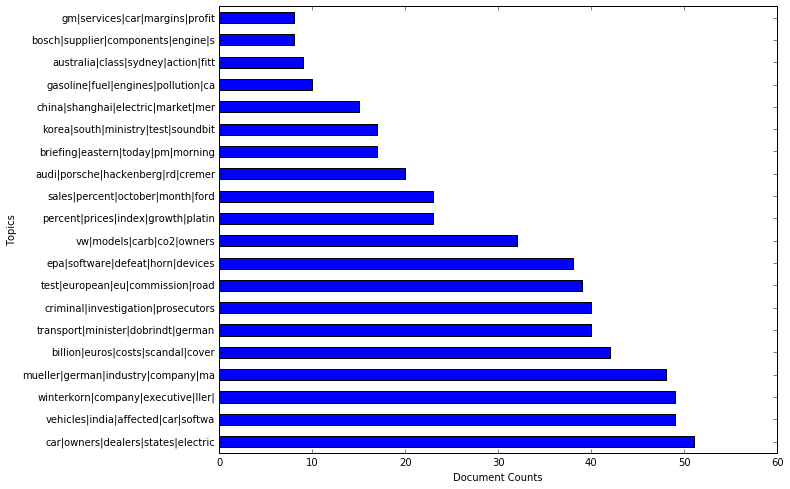

In [30]:
NMF_Bar()

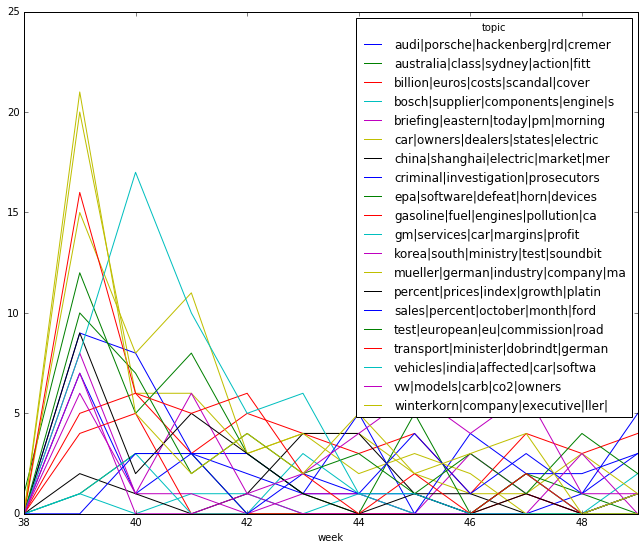

In [31]:
NMF_Line()

### The following results will use for presentation. Create visualizations for both detail topics and master topics.

In [32]:
# Generate topics using NMF
Create_Tfid_Vector(corpus, mindf=.015, maxdf=.75)
NMF_Topic_Model(n_topics=15, n_top_words=5, assign_topics=True)


(578, 2466)

-------------- Bag of Words -----------------

            word    weight
2465      zurich  5.058717
258       breach  5.058717
272        bruce  5.058717
1102    impacted  5.058717
1965  scientists  5.058717
1097       ilona  5.058717
1967     screwed  5.058717
260     breaking  5.058717
1970      season  5.058717
592     demanded  5.058717
1108     imports  5.058717
593    demanding  5.058717
1988      senate  5.058717
1989     senator  5.058717
1994     sensors  5.058717
247         bond  5.058717
1996   sentiment  5.058717
2006        sets  5.058717
1930      rolled  5.058717
585   deliberate  5.058717
2015      shared  5.058717
1852     remarks  5.058717
1159     intense  5.058717
1820    refitted  5.058717
1823    refugees  5.058717

------------ NMF Topics --------------

Topic #0:
vw|audi|porsche|andreas|cremer
Topic #1:
epa|software|defeat|horn|devices
Topic #2:
sales|percent|october|month|year
Topic #3:
german|transport|minister|dobrindt|berlin
Topic #4:
test|eur

In [33]:
# Manually maintain this dictionary after considering topics generated
# Update accordingly for additional groupings or better descriptors
master_topic = {}    # we want to graph the actual topics here so leave this blank for now
    
# Create custom charts for Master Topics
Create_Corpus_with_Topics()

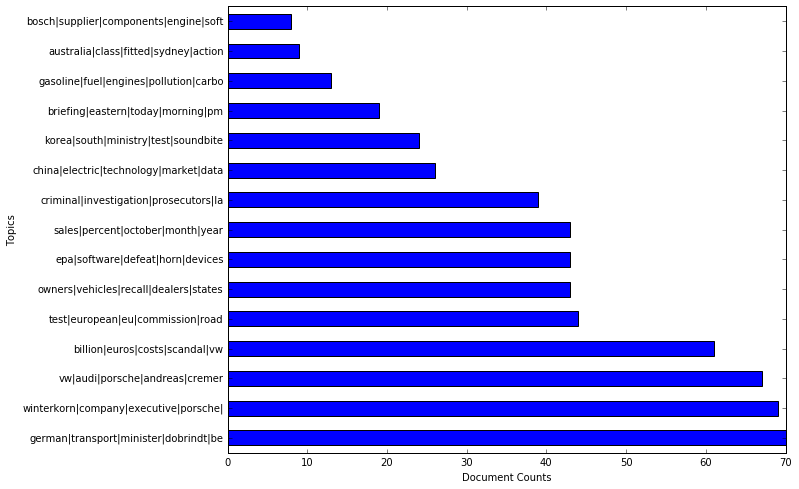

In [34]:
NMF_Bar()

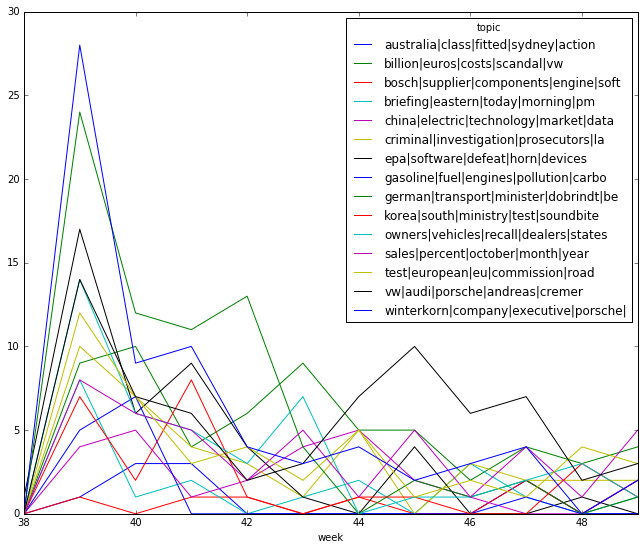

In [35]:
NMF_Line()

### Ok, now have some topics that are desirable from last run. Refine them further. Create a "Master Topic" for better description as well as additional groupings for final visualizations.

In [36]:
# Manually maintain this dictionary after considering topics generated
# Update accordingly for additional groupings or better descriptors

master_topic = {'test|european|eu|commission|road':'Global Road Tests',
                'sales|percent|october|month|year':'Financial Impacts',
                'epa|software|defeat|vehicles|agency':'EPA Findings',
                'korea|south|ministry|test|unit':'Global Road Tests',
                'china|electric|technology|market|data':'Electric Markets',
                'bosch|supplier|components|engine|software':'Bosch Implication',
                'australia|class|fitted|action|sydney':'Investigation and Litigation',
                'billion|euros|costs|scandal|analysts':'Financial Impacts',
                'winterkorn|company|executive|chief|board':'Management Statements',
                'fuel|gasoline|engines|pollution|standards':'Pollution Standards',
                'briefing|eastern|today|morning|pm':'Investigation and Litigation',
                'german|transport|minister|dobrindt|berlin':'German Government Statements',
                'criminal|investigation|prosecutors|justic':'Investigation and Litigation',
                'audi|porsche|hackenberg|thursday|cremer':'Management Statements',
                'vw|owners|models|mueller|dealers':'Owners and Dealers'
                }
    
# Create custom charts for Master Topics
Create_Corpus_with_Topics()

In [37]:
# Display table of master topics and detailed topics
tmp_df = DataFrame(zip(corpus_with_nmf['master_topic'],corpus_with_nmf['topic']),columns=['master_topic','topic'])
sum_df = DataFrame(pd.pivot_table(tmp_df,index=['master_topic','topic'],aggfunc=len, fill_value=0))
sum_df
sum_df.to_csv(pathnameout + 'topics_out.csv')


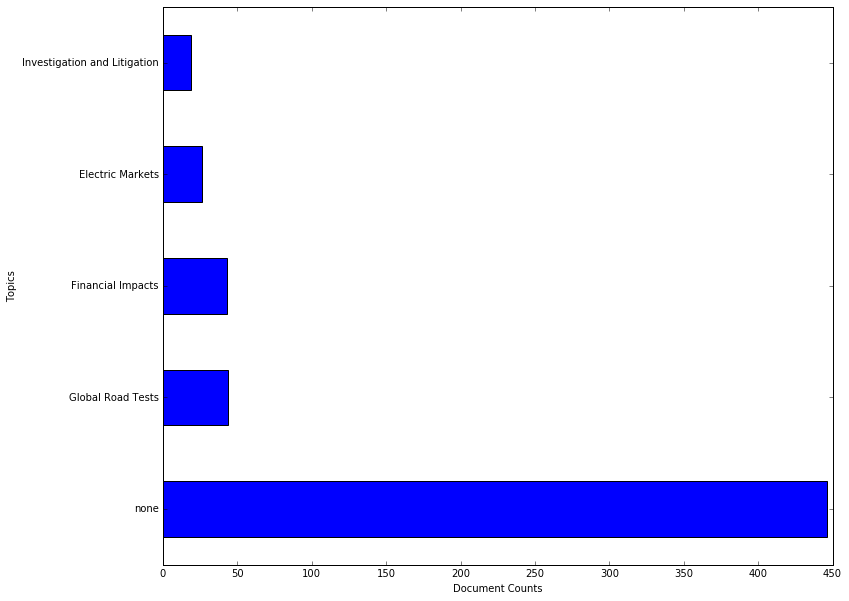

In [38]:
# Bar Plot of Master Topics
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# This assumes dataframe 'corpus_with_nmf' contains desired data

plt.ylabel('Topics')
plt.xlabel('Document Counts')
corpus_with_nmf['master_topic'].value_counts().plot(kind='barh', figsize=(12,10))
  

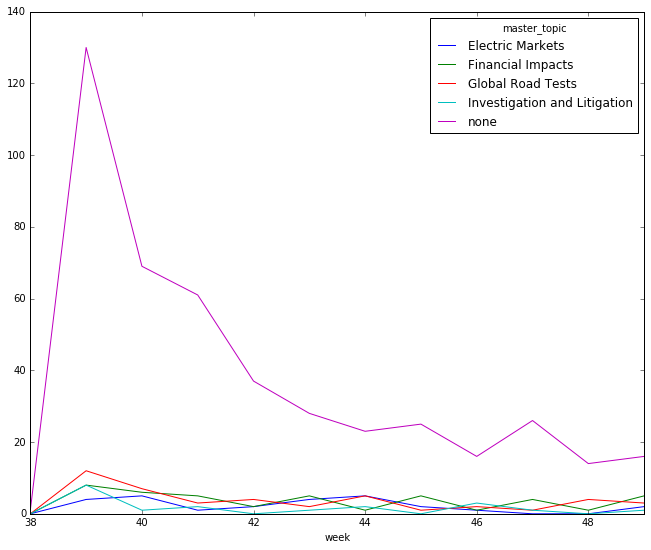

In [39]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# This assumes dataframe 'corpus_with_nmf' contains desired data

tmp_df = DataFrame(zip(corpus_with_nmf['master_topic'],corpus_with_nmf['week']),columns=['master_topic','week'])
pd.pivot_table(tmp_df,index='week',columns='master_topic', aggfunc=len, fill_value=0).plot(kind='line', legend=1, figsize=(11,9))


### Try package *GraphLab* for topic extraction with objective of using *pyLDAvis* for visualization.

#### Apparently *pyLDAvis* is agnostic to the model used according to this:  http://nbviewer.ipython.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb#topic=1&lambda=0.5&term= . My intent would be to use *NMF* with *pyLDAvis*, however, in the essence of time I will use *GraphLab* to fit a model as it has hooks for pyLDAvis. At this time, it is unclear to me how to prepare model data from NMF in order to feed pyLDAvis. 

#### Further info on *pyLDAvis*:
* https://www.youtube.com/watch?v=IksL96ls4o0
* https://www.youtube.com/watch?v=tGxW2BzC_DU&index=4&list=PLykRMO7ZuHwP5cWnbEmP_mUIVgzd5DZgH

In [40]:
def Create_Count_Vector(collection, mindf, maxdf):
    from sklearn.feature_extraction.text import CountVectorizer

    global cv
    global cv_m
    global cv_m_array
    global cv_m_features
    
    # use a different vectorizer, word counts specifically
    #cv = CountVectorizer(binary=True, min_df=mindf, max_df=maxdf)
    cv = CountVectorizer(binary=False, min_df=mindf, max_df=maxdf)
    cv_m = cv.fit_transform(collection)
    cv_m_array = cv_m.astype(int).toarray()
    cv_m_features = cv.get_feature_names()
    
    print(cv_m.shape) 

In [41]:
def Graphlab_Topic_Model(n_topics):
    import graphlab as gl
    
    global graphlab_docs
    global topic_model

    # Graphlab Topic Modeling

    # create bag of words for each document
    
    # a bit of munging here....
    # graphlab requires an array of documents, each with a dictionary,
    # representing the bag of words for the document
    bows = []
    bows = [dict(enumerate(cv_m_array[i])) for i in range(0,len(cv_m_array))]

    # replace dictionary integer word keys with the actual 'word'
    for i in range(0,len(bows)):
        for j in range(0,len(bows[i])):
            bows[i][str(cv_m_features[j])] = bows[i].pop(j)

    # convert an array of documents each that have a dictionary of words
    # to an sframe (sframe is part of the graphlab package)
    graphlab_docs = gl.SArray(bows)

    # build graphlab topic model
    topic_model = gl.topic_model.create(graphlab_docs, num_topics=n_topics, num_iterations=500)

    topic_model.get_topics().print_rows(75)

In [42]:
# Graphlab utilizes word count vector
Create_Count_Vector(corpus, mindf=.011, maxdf=.90)


(578, 3233)


In [43]:
# Build Graphlab model
Graphlab_Topic_Model(n_topics=15)   # Tesla is topic #9


ImportError: No module named graphlab

In [ ]:
# Visualize with pyLDAavis and D3
import pyLDAvis
import pyLDAvis.graphlab
    
# Graphlab Topic Visualization via pyLDAvis and D3
# pyLDAvis works with a number of models, not just LDA
    
pyLDAvis.enable_notebook()
pyLDAvis.graphlab.prepare(topic_model, graphlab_docs)


In [ ]:
##################################################################################################
# The following function definition is supposed to demonstrate how vector data from any model can
# be loaded into the pyLDAvis visualization tool.  pyLDAvis is model agnostic.  It isn't clear to me
# the exact data and format from the dictionary below but something to pursue further.
##################################################################################################
# def load_R_model(filename):
#     with open(filename, 'r') as j:
#         data_input = json.load(j)
#     data = {'topic_term_dists': data_input['phi'], 
#             'doc_topic_dists': data_input['theta'],
#             'doc_lengths': data_input['doc.length'],
#             'vocab': data_input['vocab'],
#             'term_frequency': data_input['term.frequency']}
#     return data

# movies_model_data = load_R_model('data/movie_reviews_input.json')

# print('Topic-Term shape: %s' % str(np.array(movies_model_data['topic_term_dists']).shape))
# print('Doc-Topic shape: %s' % str(np.array(movies_model_data['doc_topic_dists']).shape))


# import pyLDAvis
# movies_vis_data = pyLDAvis.prepare(**movies_model_data)

# pyLDAvis.display(movies_vis_data)

## K-Means with PCA

I try a PCA and K-Means analysis here to see any correlation with number of topics

In [ ]:
# PCA Analysis
PCA(components=10)
Randomized_PCA(components=10)
K_Means(clusters=10, mxitr=100, procs=4)


In [ ]:
# K-means Optimal
K_Means_Optimal(rng=50, mxitr=500, procs=4)

In [ ]:
# Generate a K-Means with optimal "k" from previous
K_Means_wPCA(clusters=35, procs=4)

In [ ]:
# Generate a K-Means with k=15
K_Means_wPCA(clusters=15, procs=4)

In [ ]:
# Generate a K-Means with k=20
K_Means_wPCA(clusters=20, procs=4)